# CoverMyMeds Project
### Authors: Shuo Xu

### Abstract

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

#### Import data

In [2]:
bridge = pd.read_csv('bridge.csv')
dim_claims = pd.read_csv('dim_claims.csv')
dim_date = pd.read_csv('dim_date.csv')
dim_pa = pd.read_csv('dim_pa.csv')

In [3]:
bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [4]:
bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [5]:
dim_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [6]:
dim_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [7]:
dim_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [8]:
dim_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [9]:
dim_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [10]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


In [91]:
c = pd.DataFrame(dim_claims.bin.value_counts())
c

,bin
999001,640740
417614,307323
417740,213982
417380,173531


In [12]:
dim_claims.drug.value_counts()

A    679283
B    342750
C    313543
Name: drug, dtype: int64

In [13]:
dim_claims.reject_code.value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

In [14]:
dim_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


Text(0.5, 1.0, 'horsepower bins')

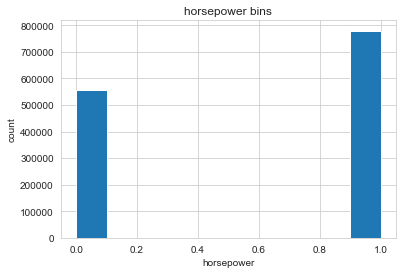

In [16]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dim_claims["pharmacy_claim_approved"])
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [67]:
App_417380 = dim_claims[(dim_claims["pharmacy_claim_approved"]==1) & (dim_claims["bin"]==417380)]["pharmacy_claim_approved"].count()

In [68]:
App_999001 = dim_claims[(dim_claims["pharmacy_claim_approved"]==1) & (dim_claims["bin"]==999001)]["pharmacy_claim_approved"].count()

In [69]:
App_417740 = dim_claims[(dim_claims["pharmacy_claim_approved"]==1) & (dim_claims["bin"]==417740)]["pharmacy_claim_approved"].count()

In [70]:
App_417614 = dim_claims[(dim_claims["pharmacy_claim_approved"]==1) & (dim_claims["bin"]==417614)]["pharmacy_claim_approved"].count()

In [92]:
Tot_999001= c.iloc[0,0]
Tot_417614= c.iloc[1,0]
Tot_417740= c.iloc[2,0]
Tot_417380= c.iloc[3,0]

In [95]:
App_Rate_999001 = App_999001/Tot_999001
App_Rate_417614 = App_417614/Tot_417614
App_Rate_417740 = App_417740/Tot_417740
App_Rate_417380 = App_417380/Tot_417380

In [97]:
Company = ['999001','417614','417740','417380']

In [98]:
App_Rate = [App_Rate_999001, App_Rate_417614, App_Rate_417740, App_Rate_417380]

In [99]:
AppRate = {
    "Company": Company,
    "App_Rate": App_Rate
}
AppRatedf = pd.DataFrame(AppRate)

In [101]:
AppRatedf.head()

,Company,App_Rate
0,999001,0.900002
1,417614,0.211683
2,417740,0.457753
3,417380,0.230230


array([[<AxesSubplot:title={'center':'App_Rate'}>]], dtype=object)

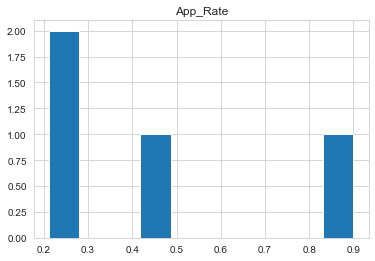

In [109]:
AppRatedf.hist(column='App_Rate')

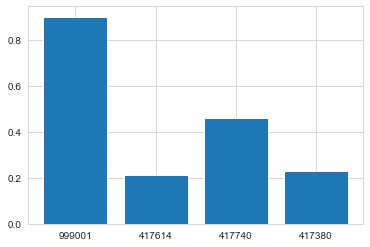

In [114]:
import matplotlib.pyplot as plt
plt.bar(AppRatedf['Company'], AppRatedf['App_Rate'])
plt.show()

In [108]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt(AppRatedf)
# set x/y labels and plot title
plt.pyplot.xlabel("Company")
plt.pyplot.ylabel("Approval Rate")
plt.pyplot.title("Approval Rate")

TypeError: 'module' object is not callable

In [62]:
Company = dim_claims["bin"].unique()

In [63]:
Company

array([417380, 999001, 417740, 417614], dtype=int64)

In [64]:
Company[0]

417380

In [65]:
Drug = dim_claims['drug'].unique()

In [66]:
Drug

array(['A', 'B', 'C'], dtype=object)